# <u>Waze Churn Prediction Project – End-to-End Data Science Case Study</u>

### **Author:** Vishnu Venugopal

This notebook documents a complete data science workflow for predicting user churn for Waze, a real-time navigation app. The project simulates a real-world workplace scenario in which I take on the role of a **Data Analyst** at Waze, collaborating with internal stakeholders to develop insights and predictive models that support user retention efforts.

---

## Waze Background
![alt text](assets/logo-waze-256.png)

**Waze** is a free navigation app that makes it easier for drivers around the world to get to where they want to go. 

**Waze’s** community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. 

**Waze** partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely.

In this *fictional scenario*, I will be collaborating with my **Waze** teammates to analyze and interpret data, generate valuable insights, and help leadership make informed business decisions. My team is about to start a new project to help prevent user churn on the **Waze** app. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn.

In my role, I will analyze user data and develop a machine learning model that predicts user churn.

This project is part of a larger effort at Waze to increase growth. Typically, high retention rates indicate satisfied users who repeatedly use the **Waze** app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow **Waze’s** business. An accurate model can also help identify specific factors that contribute to churn and answer questions such as:
*	Who are the users most likely to churn?
*	Why do users churn? 
*	When do users churn? 

For example, if **Waze** can identify a segment of users who are at high risk of churning, **Waze** can proactively engage these users with special offers to try and retain them. Otherwise, **Waze** may simply lose these users without knowing why. 
Your insights will help **Waze** leadership optimize the company’s retention strategy, enhance user experience, and make data-driven decisions about product development.

---


## The Objective
To build a machine learning model that predicts monthly user churn based on behavioral engagement data (e.g., sessions, drives, distance, time). The goal is to help the business **identify at-risk users** and **improve retention strategies**.

---

## The Dataset
A fictional Waze user dataset was provided as part of the Google Advanced Data Analytics Professional Certificate (Courses 1–6). It includes:
- Engagement features: sessions, drives, distance, time
- Activity timelines: onboarding days, app usage
- Device type
- Target variable: churn label (`retained` vs `churned`)
- The `label` column has missing values (this was handled later in the project)

| Column Name              | Type   | Description                                                                 |
|--------------------------|--------|-----------------------------------------------------------------------------|
| ID                       | int    | A sequential numbered index                                                 |
| label                    | obj    | Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month |
| sessions                 | int    | The number of occurrences of a user opening the app during the month       |
| drives                   | int    | An occurrence of driving at least 1 km during the month                     |
| device                   | obj    | The type of device a user starts a session with                             |
| total_sessions           | float  | A model estimate of the total number of sessions since a user has onboarded |
| n_days_after_onboarding  | int    | The number of days since a user signed up for the app                       |
| total_navigations_fav1   | int    | Total navigations since onboarding to the user’s favorite place 1          |
| total_navigations_fav2   | int    | Total navigations since onboarding to the user’s favorite place 2          |
| driven_km_drives         | float  | Total kilometers driven during the month                                    |
| duration_minutes_drives  | float  | Total duration driven in minutes during the month                           |
| activity_days            | int    | Number of days the user opens the app during the month                      |
| driving_days             | int    | Number of days the user drives (at least 1 km) during the month             |

---

## Process Followed (PACE Framework)
This project followed the **PACE** data science workflow taught in the certification:

1. **Plan:** Understand business context, define goals, identify stakeholders  
2. **Analyze:** Inspect, explore, and test the data  
3. **Construct:** Build models and engineer features  
4. **Execute:** Deploy and evaluate machine learning models, share insights

---

## Key Deliverables
- Exploratory Data Analysis (EDA) and Visualization
- Two-Sample Hypothesis Test (iPhone vs Android usage)
- Feature Engineering
- Baseline Logistic Regression Model
- Tree-Based Models (Random Forest, XGBoost)
- Model Evaluation + Feature Importance
- Business-Focused Recommendations

---

## Tools & Libraries
- **Python** (pandas, numpy, seaborn, matplotlib, sklearn, xgboost, scipy)
- **Jupyter Notebook** (run in VSCode)
- **GitHub** (project repository: [waze-customer-churn](https://github.com/venugvis/waze-customer-churn))

---

## Timeline
This project reflects work completed across Courses 1–6 of the Google Advanced Data Analytics Certificate(between November 2024 to April 2025), culminating in a production-ready case study suitable for a professional portfolio.

## <u>PACE Workflow</u>
![alt text](assets/project_proposal.png)

As a new data analyst at Waze, I was tasked with helping reduce monthly user churn. This section outlines the initial project planning and communication process following the **PACE (Plan, Analyze, Construct, Execute)** framework taught in the Google Advanced Data Analytics Certificate.

---
### Project Goal
Build a machine learning model to predict monthly churn using behavioral user data, and communicate actionable insights to leadership.


### Stakeholders
- **May Santner** – Data Analysis Manager (Direct Supervisor)
- **Harriet Hadzic** – Director of Data Analysis
- **Sylvester Esperanza** – Senior Project Manager
- **Chidi Ga** – Senior Data Analyst
- **Ursula Sayo & Emrick Larson** – Cross-functional stakeholders

### Key Milestones
| Stage        | Task |
|--------------|------|
| **Plan**     | Draft project proposal, define goal, identify stakeholders |
| **Analyze**  | Inspect dataset, explore structure, perform EDA and hypothesis testing |
| **Construct**| Engineer features, build regression and ML models |
| **Execute**  | Evaluate models, share executive summaries, extract insights for stakeholders |


### Key Planning Questions
- What user behaviors best predict churn?
- Are certain user segments more likely to churn (e.g., device type)?
- How will model results be communicated to non-technical stakeholders?
- What actions can the business take based on the findings?



---

## <u>Analyze: Data Import & Structure</u>
![alt text](assets/understand_the_data.png)

In this phase, I loaded the Waze churn dataset and performed initial inspection and validation. This helps assess data quality and prepare for deeper analysis.

The dataset was provided by Waze’s internal data infrastructure team and reflects user behavior over a defined period, including activity metrics, device type, and churn status.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_csv('../data/waze_dataset.csv')

# Preview first few rows
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [3]:
# Basic dataset shape and info
print("Shape:", df.shape)
df.info()


Shape: (14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


### Data Overview & Quality Check

This section summarizes the structure and quality of the dataset. It includes:
- Column types
- Missing values
- Descriptive statistics

This ensures the data is well-understood before modeling or analysis begins.


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2)
})

missing_df[missing_df['Missing Values'] > 0].sort_values(by = 'Percentage (%)', ascending = False)


,Missing Values,Percentage (%)
label,700,4.67


In [5]:
# Descriptive statistics for numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,14999.0,7499.000000,4329.982679,0.000000,3749.500000,7499.000000,11248.500000,14998.000000
sessions,14999.0,80.633776,80.699065,0.000000,23.000000,56.000000,112.000000,743.000000
drives,14999.0,67.281152,65.913872,0.000000,20.000000,48.000000,93.000000,596.000000
total_sessions,14999.0,189.964447,136.405128,0.220211,90.661156,159.568115,254.192341,1216.154633
n_days_after_onboarding,14999.0,1749.837789,1008.513876,4.000000,878.000000,1741.000000,2623.500000,3500.000000
total_navigations_fav1,14999.0,121.605974,148.121544,0.000000,9.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14999.0,29.672512,45.394651,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14999.0,4039.340921,2502.149334,60.441250,2212.600607,3493.858085,5289.861262,21183.401890
duration_minutes_drives,14999.0,1860.976012,1446.702288,18.282082,835.996260,1478.249859,2464.362632,15851.727160
activity_days,14999.0,15.537102,9.004655,0.000000,8.000000,16.000000,23.000000,31.000000


### Initial Observations

- The dataset contains **14,999 rows** and multiple user behavior metrics.
- The `label` column, which likely indicates churn, has **700 missing values** (~4.67%) and will require further attention.
- Key variables such as `drives`, `sessions`, and `duration_minutes_drives` show high variability and may contain outliers.
- Some users have **extremely high values** in features like `driven_km_drives` (max ≈ 21,183 km) and `duration_minutes_drives`, suggesting either power users or data anomalies.

These early findings will guide the next step: **exploratory data analysis and visualization**.


---

## <u>Analyze: Exploratory Data Analysis (EDA)</u>
![alt text](assets/eda.png)

The goal of EDA is to better understand patterns, detect anomalies, and spot trends in the data that may inform our churn prediction model.

We'll begin by plotting distributions of key behavioral metrics to assess their shape, scale, and potential outliers.


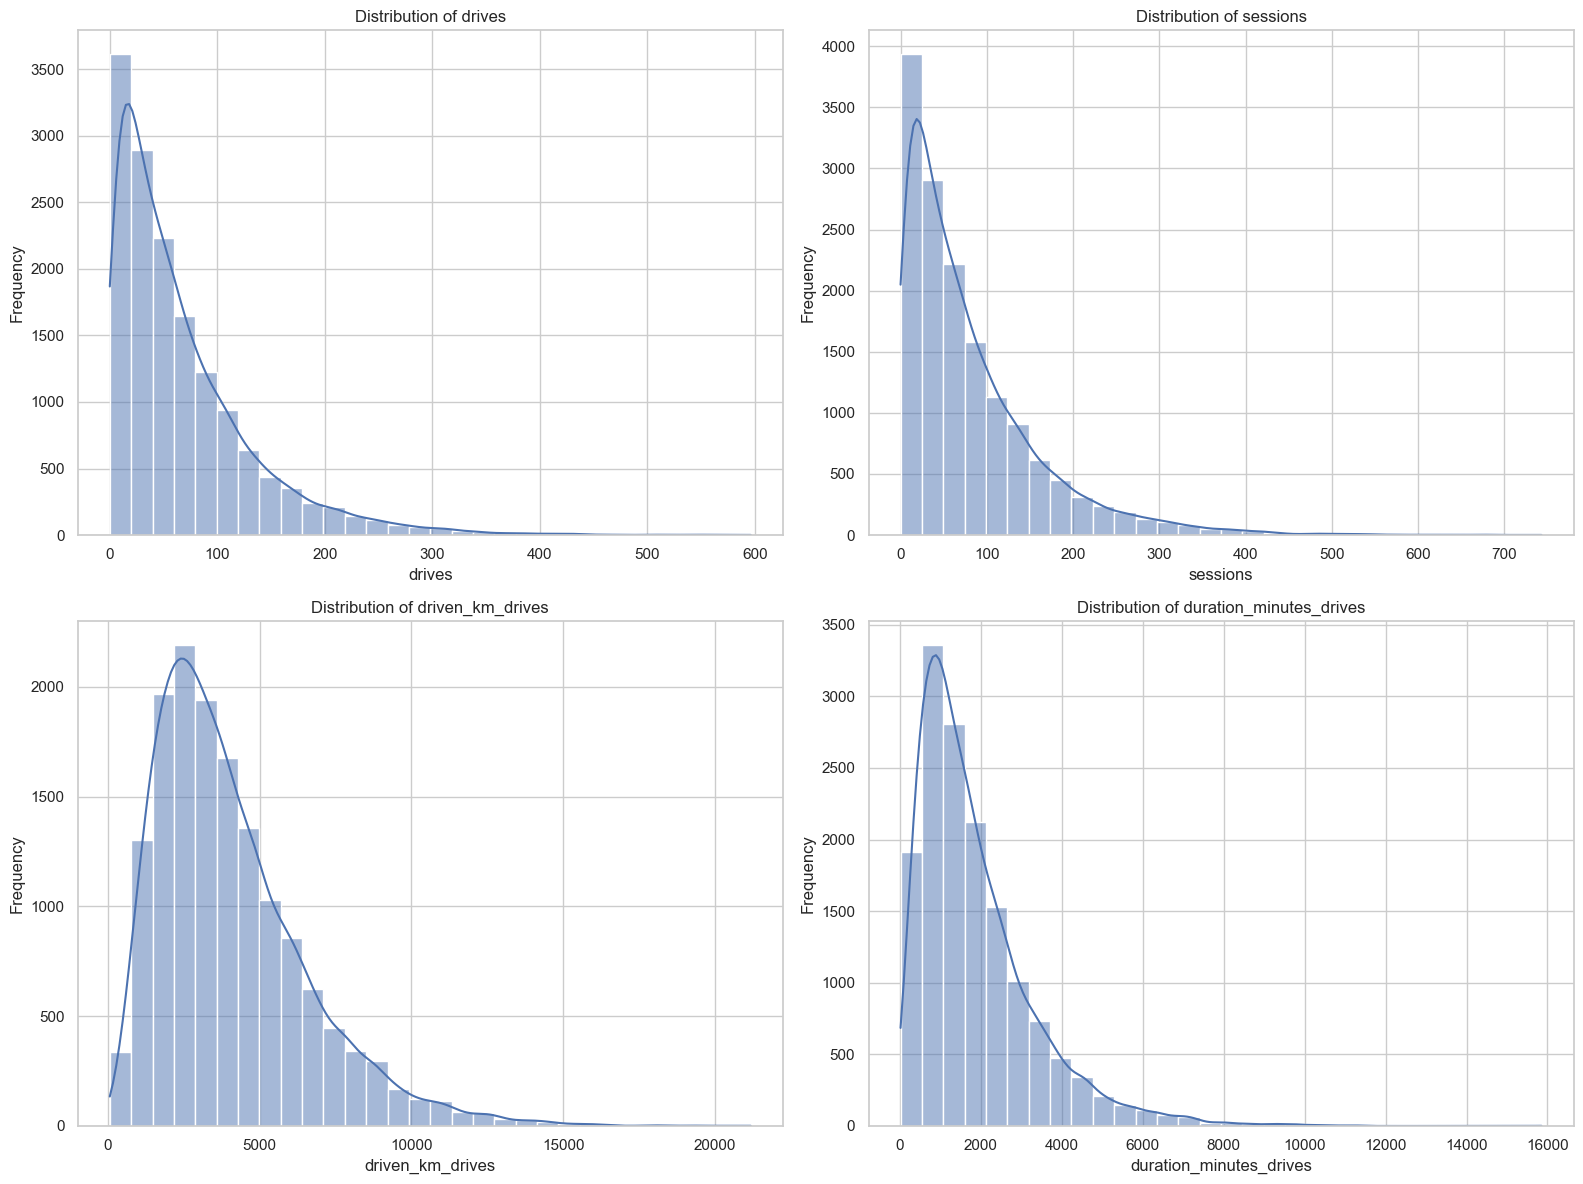

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set a consistent style
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (16, 12))

# List of columns to visualize
columns = ['drives', 'sessions', 'driven_km_drives', 'duration_minutes_drives']

# Create histograms
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Distribution Insights

- All four key behavioral metrics are **right-skewed**, indicating a majority of users engage minimally, while a small group shows extreme values. This could represent outliers or **power users**.

- These distributions will be important to keep in mind during feature engineering and model development, particularly when interpreting coefficients or applying algorithms sensitive to outliers.


---

### Boxplots for Outlier Detection

Boxplots provide a concise view of the spread and outliers in each numeric feature. This helps identify which variables may need scaling, capping, or transformation.


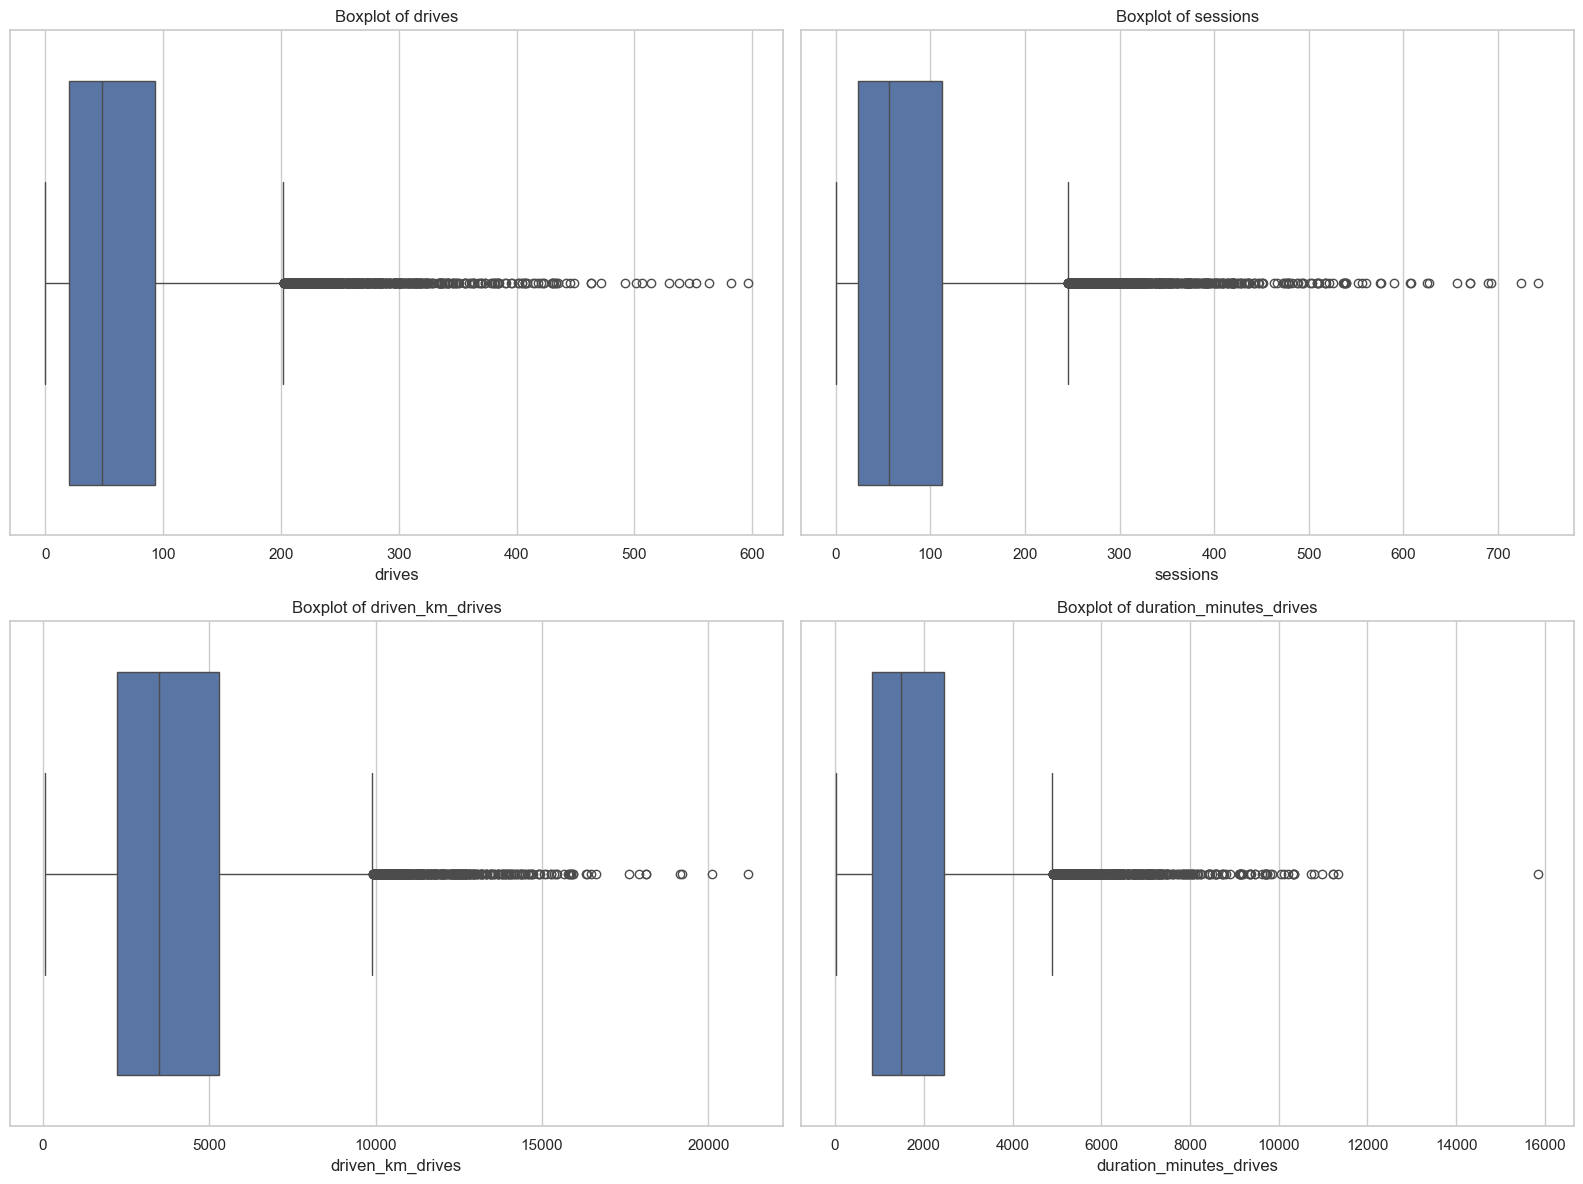

In [7]:
plt.figure(figsize = (16, 12))
columns = ['drives', 'sessions', 'driven_km_drives', 'duration_minutes_drives']

for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data = df, x = col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


#### Outlier Insights

- Boxplots confirm the presence of **significant right-tail outliers** in all four behavioral metrics. These likely represent *highly active or long-term users*, rather than data entry errors.

- Rather than dropping these values, I will explore transformations (e.g., log scaling) and use robust algorithms that are less sensitive to outliers during the modeling phase.

- These skewed distributions may affect models like **Logistic Regression** more than **tree-based models**, which are less sensitive to scaling. 

---

### Variable Relationships – Scatter Plots

Next, I explored how user behavior variables relate to each other. These scatter plots help reveal correlation, nonlinear patterns, or clusters that might be useful in modeling churn risk.


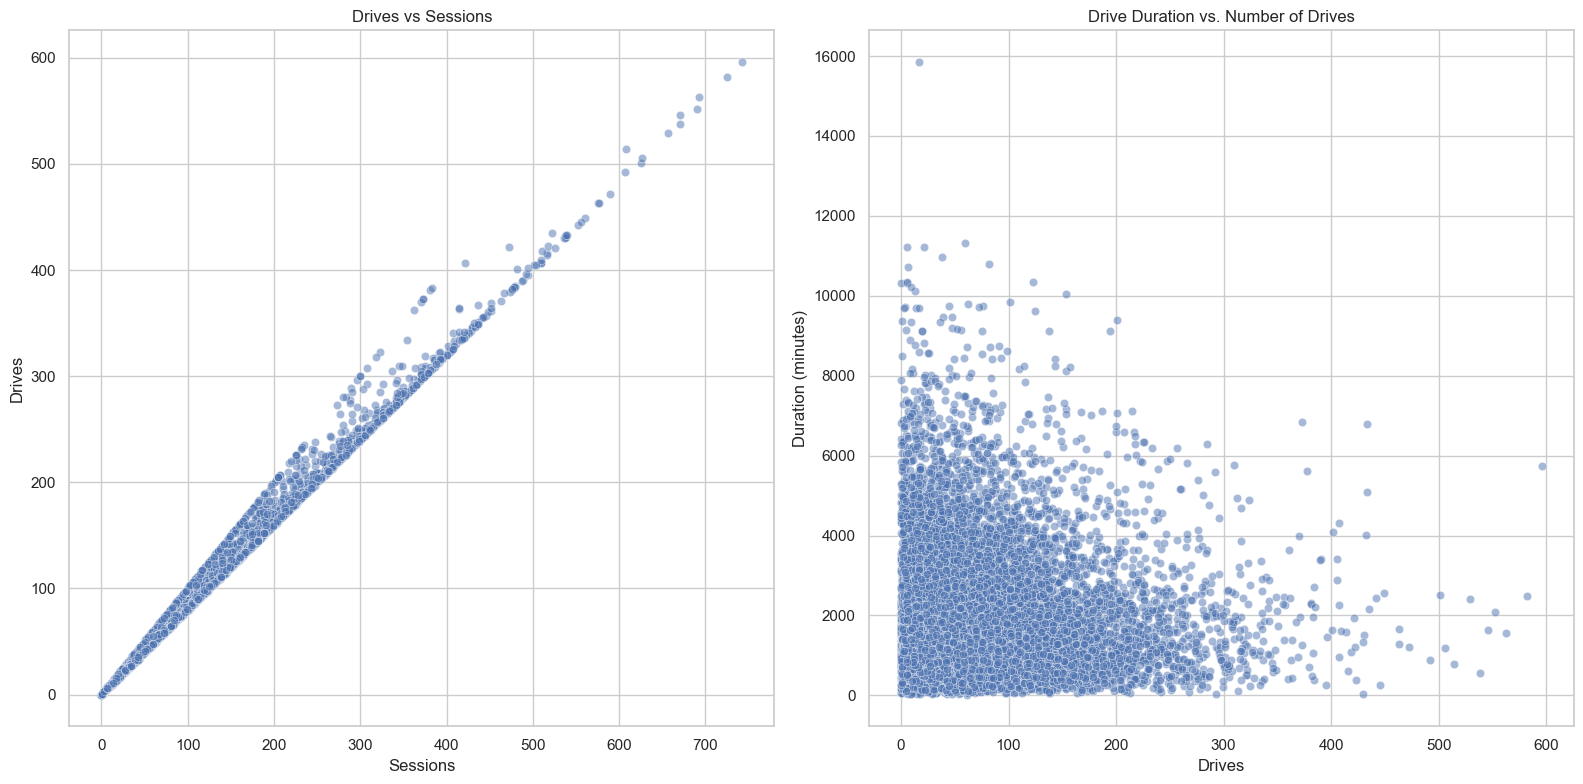

In [8]:
plt.figure(figsize = (16,8))

# Scatter: sessions vs drives
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'sessions', y = 'drives', alpha = 0.5)
plt.title('Drives vs Sessions')
plt.xlabel('Sessions')
plt.ylabel('Drives')

# Scatter: drives bs duration_minutes_drives
plt.subplot(1,2,2)
sns.scatterplot(data = df, x = 'drives', y='duration_minutes_drives', alpha = 0.5)
plt.title('Drive Duration vs. Number of Drives')
plt.xlabel('Drives')
plt.ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()

#### Relationship Insights

- **Drives vs Sessions** shows a near-perfect linear relationship, indicating potential redundancy. Multicollinearity should be addressed during modeling by dropping or combining one of these features.

- **Drives vs Duration** suggests that users with fewer drives tend to have longer drive durations, while high-frequency drivers generally have shorter, more consistent durations. This may reflect different user personas (e.g., casual vs habitual users).

This reinforces the value of potential new features like **average duration per drive** or **drives per session**, and guides feature selection in the modeling phase.


---

### Correlation Heatmap

The correlation matrix highlights relationships between numeric variables. This helps detect multicollinearity and informs which features may be redundant or most predictive of churn.


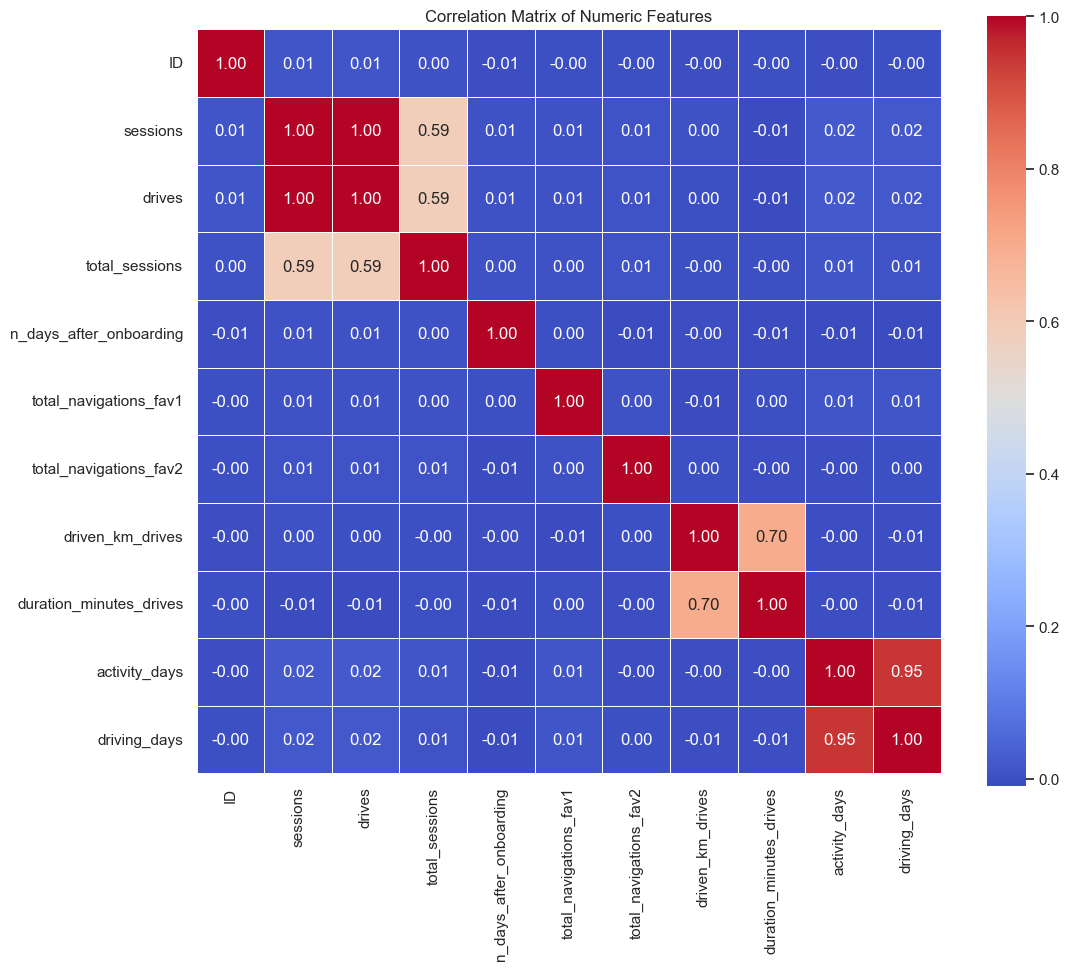

In [9]:
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only = True)

# Plot heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', square = True, linewidth = 0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#### Correlation Insights

- **Drives and sessions** have a perfect correlation (1.00), suggesting redundancy. One should be dropped to avoid multicollinearity.
- **Driving days and activity days** are also strongly correlated (0.95). A new ratio-based feature may better capture user behavior.
- **Drive duration and distance** show a moderate correlation (0.70), which aligns with real-world expectations but may be influenced by outliers.

This correlation matrix will directly inform feature selection and engineering in the next phase.


---

### Target Variable: Churn Label Analysis

The `label` column represents the churn outcome — our target variable. Before modeling, it's critical to:
- Understand the distribution of churned vs. retained users
- Assess missing values
- Check for class imbalance


In [10]:
# Check value counts, including NaNs
df['label'].value_counts(dropna = False)

label
retained    11763
churned      2536
NaN           700
Name: count, dtype: int64

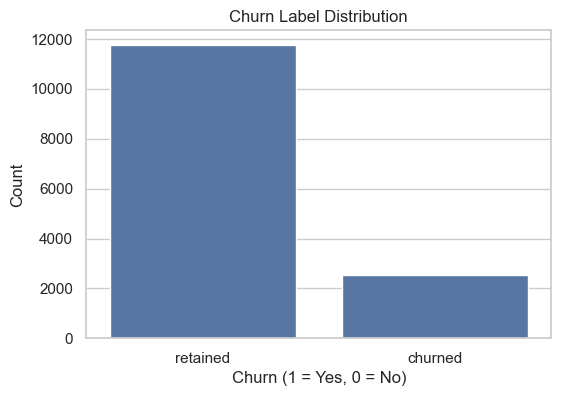

In [11]:
# Bar plot of label distribution (excluding missing for visual clarity)
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = 'label')
plt.title('Churn Label Distribution')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


#### Target Label Summary

- The target variable `label` is a **categorical churn indicator** with two values: `'retained'` and `'churned'`.
- There is a moderate class imbalance: **78% retained**, **17% churned**, and **5% missing**.
- The 700 missing labels will be removed from the training dataset to ensure clean supervised learning.


In [12]:
# Drop rows with missing target labels
df_clean = df.dropna(subset=['label']).copy()

# Encode the target variable: retained = 0, churned = 1
df_clean['label'] = df_clean['label'].map({'retained': 0, 'churned': 1})


---

## Hypothesis Testing: Drives by Device Type

![alt text](assets/stat_test.png)

As requested by Waze leadership, we conducted a two-sample hypothesis test to determine whether there is a significant difference in the average number of drives between iPhone and Android users.

### Hypotheses:
- **Null Hypothesis (H₀):** There is no difference in mean drives between iPhone and Android users.
- **Alternative Hypothesis (H₁):** There is a significant difference in mean drives between the two groups.

Test Type: **Two-sample, independent t-test**  
Assumptions: Normality (approximate), unequal variance (Welch’s t-test)


In [13]:
from scipy.stats import ttest_ind

# Separate drives by device type
iphone_drives = df_clean[df_clean['device'] == 'iPhone']['drives']
android_drives = df_clean[df_clean['device'] == 'Android']['drives']

# Perform Welch’s t-test (assumes unequal variance)
t_stat, p_value = ttest_ind(iphone_drives, android_drives, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")


T-statistic: 1.677
P-value: 0.09365


### Hypothesis Test Result:

- **T-statistic:** 1.677  
- **P-value:** 0.09365

### Hypothesis Interpretation:
Since the p-value is **greater than 0.05**, we **fail to reject the null hypothesis**.

There is **no statistically significant difference** in the average number of drives between iPhone and Android users in this dataset.

This suggests that churn prediction strategies may **not need to be platform-specific** based on drive frequency alone, though other behavioral factors (e.g., session patterns or duration) may still vary by device.


---

## Feature Engineering

To improve model performance and interpretability, I engineered new features that capture normalized user behavior, removed highly correlated columns, and prepared the dataset for modeling.


In [14]:
# Create new features
df_clean['avg_drive_duration'] = df_clean['duration_minutes_drives'] / df_clean['drives']
df_clean['driving_ratio'] = df_clean['driving_days'] / df_clean['activity_days']

# Drop highly correlated or redundant features
df_model = df_clean.drop(columns=[
    'ID',   # identifier, no predictive value
    'sessions',     # perfectly correlated with `drives`
    'activity_days'     # highly correlated with `driving_days` 
])

In [15]:
# Fix avg_drive_duration to avoid division by zero
df_clean['avg_drive_duration'] = np.where(
    df_clean['drives'] > 0,
    df_clean['duration_minutes_drives'] / df_clean['drives'],
    0
)

# Update df_model
df_model['avg_drive_duration'] = df_clean['avg_drive_duration']




### Handling NaN in driving_ratio

The `driving_ratio` column had 233 missing values due to division by zero (`activity_days = 0`). These rows were filled with 0 to represent users who were inactive or had no drive activity.


In [16]:
# Fix driving_ratio to avoid NaN error during regression
df_model['driving_ratio'] = df_model['driving_ratio'].fillna(0)

In [17]:
df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
label,14299.0,0.177355,0.381982,0.000000,0.000000,0.000000,0.000000,1.000000
drives,14299.0,67.255822,65.947295,0.000000,20.000000,48.000000,93.000000,596.000000
total_sessions,14299.0,189.547409,136.189764,0.220211,90.457733,158.718571,253.540450,1216.154633
n_days_after_onboarding,14299.0,1751.822505,1008.663834,4.000000,878.500000,1749.000000,2627.500000,3500.000000
total_navigations_fav1,14299.0,121.747395,147.713428,0.000000,10.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14299.0,29.638296,45.350890,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14299.0,4044.401535,2504.977970,60.441250,2217.319909,3496.545617,5299.972162,21183.401890
duration_minutes_drives,14299.0,1864.199794,1448.005047,18.282082,840.181344,1479.394387,2466.928876,15851.727160
driving_days,14299.0,12.182530,7.833835,0.000000,5.000000,12.000000,19.000000,30.000000
avg_drive_duration,14299.0,108.452709,315.580148,0.000000,12.719978,31.155098,80.278358,9361.501442


### Encoding Categorical Features

The `device` column is a categorical variable with two values: `iPhone` and `Android`. To use it in modeling, I encoded it as a binary variable:
- iPhone → 1
- Android → 0


In [18]:
# Binary encoding: iPhone = 1, Android = 0
df_model['device'] = df_clean['device'].map({'iPhone': 1, 'Android': 0})

### Feature Engineering Summary

To enhance model interpretability and reduce noise, I created two normalized features:

- **avg_drive_duration**: Average minutes per drive, helping to distinguish long-trip users from frequent short-trip users.
- **driving_ratio**: Proportion of activity days that involved driving, providing a sense of engagement intensity.

I also removed redundant or highly correlated variables:
- Dropped `sessions` due to perfect correlation with `drives`
- Dropped `activity_days`, highly correlated with `driving_days`
- Dropped `ID` as it provides no predictive value

Additionaly, I binary encoded categorical `device` column.

These changes prepare the dataset for reliable model training and reduce the risk of multicollinearity or overfitting.

---

## Baseline Model: Logistic Regression

![alt text](assets/regression_modeling.png)

To establish a performance benchmark, I implemented a logistic regression model using the cleaned and engineered dataset. This provides a reference point to compare more complex models like Random Forest or XGBoost later.


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Define features and target
X = df_model.drop(columns = ['label'])
y = df_model['label']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y
)

# Initialize and train the model
log_model = LogisticRegression(max_iter=2180)
log_model.fit(X_train, y_train)

# Predict on test set
y_pred = log_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8237762237762237

Confusion Matrix:
 [[2318   35]
 [ 469   38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      2353
           1       0.52      0.07      0.13       507

    accuracy                           0.82      2860
   macro avg       0.68      0.53      0.52      2860
weighted avg       0.78      0.82      0.77      2860



### Baseline Model Evaluation: Logistic Regression

A logistic regression model was trained as a baseline for churn prediction using the cleaned and feature-engineered dataset.

#### Key Results:
- **Accuracy:** 82.2%
- **Precision (Churn):** 0.52
- **Recall (Churn):** 0.07
- **F1 Score (Churn):** 0.13

#### Observations:
- The model performed well on predicting the majority class (retained users), with a recall of **0.99**.
- However, recall for the churn class was **extremely low (0.07)**, indicating the model failed to identify most churned users.
- This imbalance is common in churn problems and highlights the **limitations of logistic regression** without class balancing techniques or more powerful models.

This baseline serves as a reference point. Next, I will evaluate tree-based models like **Random Forest** and **XGBoost** to improve recall and overall predictive power.


---

## Random Forest Classifier

![alt text](assets/ml_model.png)

To improve predictive power, especially for identifying churned users, I trained a Random Forest model. Tree-based models are well-suited for this use case as they handle non-linearity, class imbalance, and feature interactions more effectively.


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state = 42,
                                  class_weight = 'balanced'   # helps with class imbalance without any manual oversampling/undersampling
                                  )
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.8216783216783217

Confusion Matrix:
 [[2316   37]
 [ 473   34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      2353
           1       0.48      0.07      0.12       507

    accuracy                           0.82      2860
   macro avg       0.65      0.53      0.51      2860
weighted avg       0.77      0.82      0.76      2860



### Random Forest Evaluation

The Random Forest model performed similarly to the baseline logistic regression, with an accuracy of **82.2%**, but did not significantly improve recall for churn prediction (**0.07**).

#### Key Results:
- **Accuracy:** 82.2%
- **Recall (Churn):** 0.07
- **F1 Score (Churn):** 0.12
- **Confusion Matrix:** 473 false negatives (churns missed)

Although Random Forest is a more robust model, the minimal improvement suggests that:
- Feature signal may be insufficient
- Class imbalance is still affecting performance
- Additional strategies (resampling, boosting, feature tuning) are needed

This reinforces the complexity of churn prediction and the importance of addressing class imbalance directly.


---

## XGBoost Classifier

To further improve recall for churn prediction, I implemented an XGBoost classifier. XGBoost handles imbalanced data better than most algorithms by applying gradient boosting techniques and regularization.


In [21]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight to balance classes
scale_pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1]

# Initialize and train the model
xgb_model = XGBClassifier(random_state = 42, 
                          use_label_encoder = False,
                          eval_metric = 'logloss',
                          scale_pos_weight = scale_pos_weight
                          )
xgb_model.fit(X_train, y_train)


# Predit on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.7433566433566433

Confusion Matrix:
 [[1931  422]
 [ 312  195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      2353
           1       0.32      0.38      0.35       507

    accuracy                           0.74      2860
   macro avg       0.59      0.60      0.59      2860
weighted avg       0.76      0.74      0.75      2860



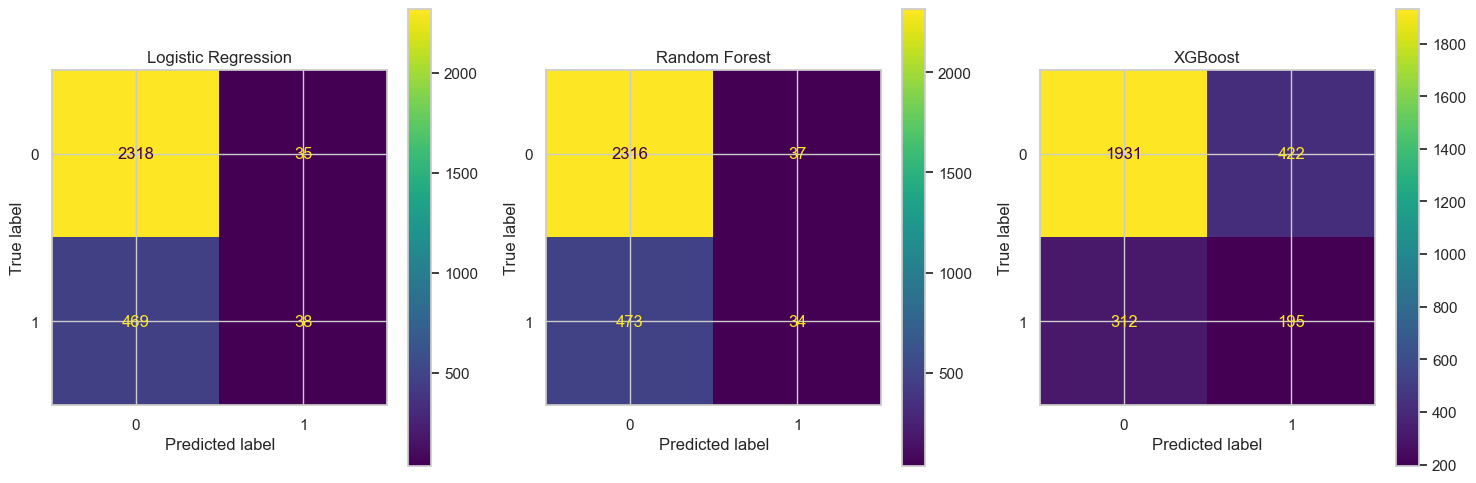

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure with 1 row and 3 columns of subplots

# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_model.classes_)
disp_log.plot(ax=axes[0], values_format='')
axes[0].set_title('Logistic Regression')

# Confusion Matrix for Random Forest Regression
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(ax=axes[1], values_format='')
axes[1].set_title('Random Forest')

# Confusion Matrix for XGBoost Regression
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(ax=axes[2], values_format='')
axes[2].set_title('XGBoost')

plt.tight_layout()  # Adjust layout to prevent overlapping titles
plt.show()

### XGBoost Classifier Evaluation

The XGBoost model significantly improved churn detection performance compared to both logistic regression and random forest.

#### Key Results:
- **Recall (Churn):** Increased from 0.07 → **0.38**
- **F1 Score (Churn):** Increased from ~0.13 → **0.35**
- **Accuracy:** Decreased slightly to 74.3%, which is expected due to better minority class sensitivity

#### Interpretation:
XGBoost effectively captured patterns that previous models missed and balanced performance across classes. It identified **195 churners**, a major improvement over earlier models (37–38 churners detected).

This model provides a strong foundation for further tuning or deployment and illustrates the value of boosting algorithms in imbalanced classification tasks.


## XGBoost Feature Importance

Understanding which features most influence churn predictions can help the business prioritize interventions and product improvements.


<function matplotlib.pyplot.show(close=None, block=None)>

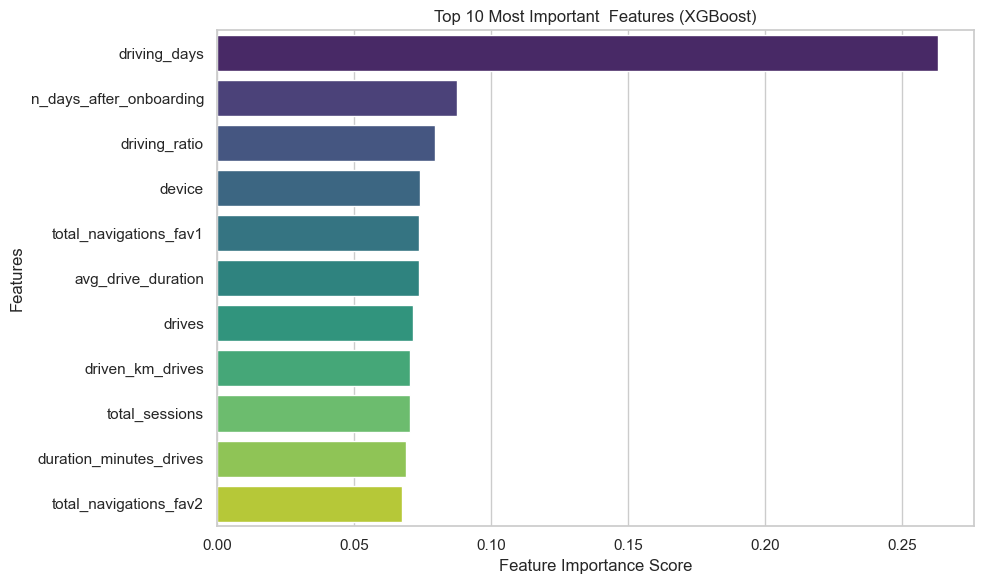

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({'Feature' : feature_names,
                            'Importance': importances}
                            ).sort_values(by = 'Importance', ascending = False)

#Plot
plt.figure(figsize = (10, 6))
sns.barplot(data = feat_imp_df,
            x = 'Importance',
            y = 'Feature',
            palette = 'viridis')

plt.title('Top 10 Most Important  Features (XGBoost)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show

### XGBoost Feature Importance Insights

The top features influencing churn prediction were:

1. **driving_days** – Most predictive of user retention, possibly reflecting user engagement habits.
2. **n_days_after_onboarding** – How long a user has been active; newer users may churn more.
3. **driving_ratio** – Ratio of activity days with driving; signals commitment to the platform.
4. **device** – Indicates churn likelihood might vary by platform (iPhone vs Android).
5. **total_navigations_fav1** – Engagement with favorite destinations may relate to retention.
6. **avg_drive_duration** – Indicates trip patterns; longer drives could mean different use cases.
7. **drives / sessions / km driven / minutes** – All point to frequency, depth, and diversity of usage.

#### Interpretation:
XGBoost identified behavioral engagement metrics (especially **driving_days** and **n_days_after_onboarding**) as key predictors of churn.

This gives stakeholders actionable insights to focus retention strategies on:
- Early onboarding experience
- Driving consistency
- App usage depth over time


---

## Final Summary & Business Recommendations

This project successfully developed and evaluated machine learning models to predict monthly churn among Waze users, based on behavioral data such as driving activity, navigation patterns, and device type. The workflow followed the PACE framework and applied both statistical analysis and predictive modeling techniques.

### Key Takeaways:

- **Data Quality & Structure:**
  - The dataset contained 14,999 users, with a moderate churn rate (~17%) and some missing or imbalanced labels.
  - Exploratory Data Analysis (EDA) revealed strong variability and outliers in user engagement, especially among high-frequency drivers.

- **Hypothesis Testing:**
  - No statistically significant difference in driving behavior between iPhone and Android users (p-value = 0.093).
  - This suggests churn behavior is likely driven by usage patterns rather than device type alone.

- **Modeling Results:**
  - **Logistic Regression** provided a baseline accuracy of 82.2% but struggled with churn recall (0.07).
  - **Random Forest** matched baseline accuracy but showed limited improvement in recall.
  - **XGBoost** significantly improved recall for churned users (0.38), demonstrating better sensitivity to minority class patterns.

- **Top Predictive Features (XGBoost):**
  - `driving_days`, `n_days_after_onboarding`, and `driving_ratio` were most important for predicting churn.
  - These metrics reflect **user consistency**, **tenure**, and **depth of engagement**.

### Business Recommendations:

1. **Target Early Engagement:**
   - Users with fewer `driving_days` and low early usage may be at higher risk of churn. Consider onboarding nudges or tutorial content.

2. **Monitor Activity Patterns:**
   - Low `driving_ratio` or `avg_drive_duration` may signal declining interest. Trigger in-app reminders or rewards to re-engage these users.

3. **Segment by Tenure:**
   - New users (`n_days_after_onboarding` low) churn more. Personalized retention strategies should focus on the first 30–60 days.

4. **Platform-Neutral Strategy:**
   - Since device type was not a significant churn driver, retention strategies can be designed uniformly across Android and iOS platforms.

---

This project demonstrates the value of combining statistical analysis, feature engineering, and machine learning to address real-world business problems. Future work could explore **time-series churn prediction**, **A/B testing of retention tactics**, or **deployment-ready model pipelines**.
